In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
df = pd.read_csv('C:\Correlaid\kn_girls_day_24\data\data.csv')

In [ ]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,duration_ms,time_signature,artist,song,this_week,last_week,peak_position,weeks_on_chart,date
0,0.474,0.338,0.0,-11.528,1.0,0.0299,0.648,0.0,0.13,0.81,...,spotify:track:5ayybTSXNwcarDtxQKqvWX,153933.0,4.0,Ricky Nelson,Poor Little Fool,1,NaN,1,1,1958-08-04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Perez Prado And His Orchestra,Patricia,2,NaN,2,1,1958-08-04
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bobby Darin,Splish Splash,3,NaN,3,1,1958-08-04
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Elvis Presley With The Jordanaires,Hard Headed Woman,4,NaN,4,1,1958-08-04
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kalin Twins,When,5,NaN,5,1,1958-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Xavi,La Victima,96,77.0,46,15,2024-04-06
343210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Jordan Davis,Tucson Too Late,97,81.0,81,4,2024-04-06
343211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Hozier,Empire Now,98,NaN,98,1,2024-04-06
343212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Olivia Rodrigo,Girl I've Always Been,99,NaN,99,1,2024-04-06


In [8]:
grouped = df.groupby('artist').size().reset_index(name='count')

# Sort by count in descending order
grouped_sorted = grouped.sort_values(by='count', ascending=False)


In [40]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'uri', 'duration_ms', 'time_signature', 'artist', 'song', 'this_week',
       'last_week', 'peak_position', 'weeks_on_chart', 'date', 'Num Features',
       'Main Artist', 'Feature1', 'Feature2', 'Feature3'],
      dtype='object')

In [43]:
grouped_song = df.groupby(['artist', 'song']).agg(count=('duration_ms', 'size'), mean_duration_ms=('duration_ms', 'mean')).reset_index()

# Sort by count in descending order
grouped_song_sorted = grouped_song.sort_values(by='count', ascending=False)
grouped_song_sorted

,artist,song,count,mean_duration_ms
10497,Glass Animals,Heat Waves,91,238805.0
28667,The Weeknd,Blinding Lights,90,253365.0
11764,Imagine Dragons,Radioactive,87,NaN
30419,Whitney Houston,I Will Always Love You,87,271093.0
25298,The 4 Seasons,"December, 1963 (Oh, What a Night)",81,197147.0
...,...,...,...,...
18463,Migos,Versace,1,NaN
18461,Migos,Supastars,1,NaN
18457,Migos,Modern Day,1,NaN
18456,Migos,Look At My Dab,1,NaN


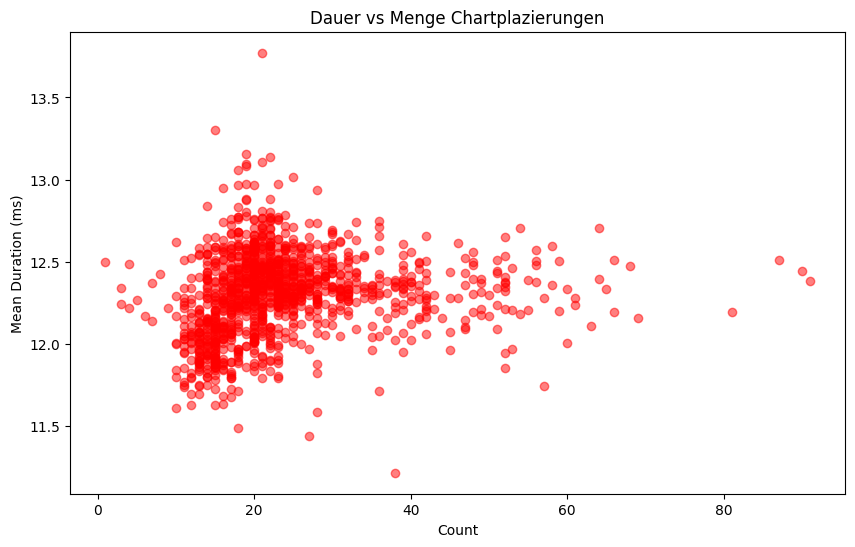

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(grouped_song_sorted['count'], np.log(grouped_song_sorted['mean_duration_ms']), color='red', alpha=0.5)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Mean Duration (ms)')
plt.title('Dauer vs Menge Chartplazierungen')

# Show plot
#plt.grid(True)
plt.show()


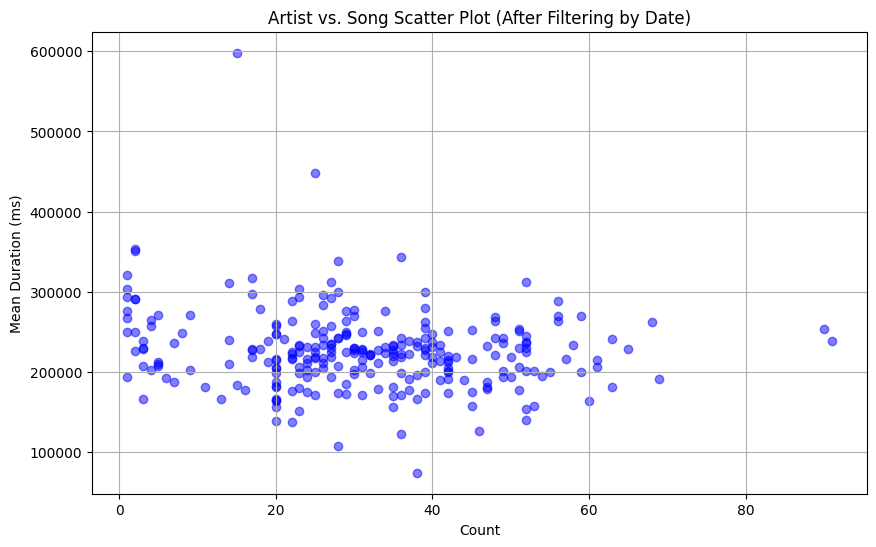

In [89]:
filtered_df = df[df['date'] >= '2006-04-23'].groupby(['artist', 'song']).agg(count=('duration_ms', 'size'), mean_duration_ms=('duration_ms', 'mean')).reset_index()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['count'], filtered_df['mean_duration_ms'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Mean Duration (ms)')
plt.title('Artist vs. Song Scatter Plot (After Filtering by Date)')

# Show plot
plt.grid(True)
plt.show()

In [69]:
grouped_song_sorted[['artist', 'song', 'mean_duration_ms']].sort_values(by='mean_duration_ms', ascending=False)

,artist,song,mean_duration_ms
24157,Stars On 45,Medley,957168.0
24924,Taylor Swift,All Too Well (Taylor's Version),598150.0
7383,Don McLean,American Pie (Parts I & II),516893.0
7223,Dire Straits,Money For Nothing,506400.0
1143,Anita Ward,Ring My Bell,491933.0
...,...,...,...
18463,Migos,Versace,NaN
18461,Migos,Supastars,NaN
18457,Migos,Modern Day,NaN
18456,Migos,Look At My Dab,NaN


In [54]:
df[df['artist'] == 'Sam Hunt'][['song']]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,this_week,last_week,peak_position,weeks_on_chart,date,Num Features,Main Artist,Feature1,Feature2,Feature3
292411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98,NaN,98,1,2014-07-12,0,Sam Hunt,NaN,NaN,NaN
292499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86,98.0,86,2,2014-07-19,0,Sam Hunt,NaN,NaN,NaN
292586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73,86.0,73,3,2014-07-26,0,Sam Hunt,NaN,NaN,NaN
292677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64,73.0,64,4,2014-08-02,0,Sam Hunt,NaN,NaN,NaN
292766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53,64.0,53,5,2014-08-09,0,Sam Hunt,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75,65.0,50,19,2022-05-14,0,Sam Hunt,NaN,NaN,NaN
333411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98,75.0,50,20,2022-05-21,0,Sam Hunt,NaN,NaN,NaN
343011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98,NaN,98,1,2024-03-23,0,Sam Hunt,NaN,NaN,NaN
343105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92,98.0,92,2,2024-03-30,0,Sam Hunt,NaN,NaN,NaN


In [21]:
df.groupby(['artist', 'song']).mean('danceability').sort_values(by='danceability', ascending=False)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,this_week,last_week,peak_position,weeks_on_chart
artist,song,,,,,,,,,,,,,,,,,
Vanilla Ice,Ice Ice Baby,0.979,0.792,2.0,-2.784,1.0,0.0388,0.0025,0.000008,0.1020,0.583,116.012,254467.0,4.0,29.380952,26.300000,9.476190,11.0
Timbaland Featuring Nelly Furtado & Justin Timberlake,Give It To Me,0.975,0.711,8.0,-3.904,1.0,0.0632,0.1680,0.000552,0.0799,0.815,110.621,234027.0,4.0,32.884615,32.320000,20.192308,13.5
Nelly,Hot In Herre,0.956,0.745,11.0,-4.753,0.0,0.1200,0.2060,0.000000,0.0615,0.912,107.075,228240.0,4.0,10.461538,9.320000,5.730769,13.5
Paula Abdul (Duet With The Wild Pair),Opposites Attract,0.955,0.883,10.0,-9.466,1.0,0.0931,0.4640,0.000002,0.1620,0.865,117.111,230240.0,4.0,33.956522,31.181818,11.521739,12.0
Nicki Minaj,Super Freaky Girl,0.951,0.878,2.0,-2.565,1.0,0.2110,0.0509,0.000016,0.3210,0.923,133.014,170977.0,4.0,20.520000,19.541667,1.000000,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
¥$: Kanye West & Ty Dolla $ign Featuring Lil Durk & Bump J,Vultures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.500000,34.000000,34.000000,1.5
¥$: Kanye West & Ty Dolla $ign Featuring North West,Talking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,30.000000,30.000000,1.5
¥$: Ye & Ty Dolla $ign,Burn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,70.000000,33.000000,5.0


In [22]:
def count_features(artist):
    # Split by 'Featuring' and '&' symbols
    artists = artist.split(' Featuring ')
    artists = [a.split(' & ') for a in artists]
    # Flatten the nested list
    flattened_artists = [item for sublist in artists for item in sublist]
    # Count the number of features
    return len(flattened_artists) - 1  # Subtract 1 for the main artist

# Apply the function to each entry in the 'artist' column
df['Num Features'] = df['artist'].apply(count_features)

# Determine the maximum number of features
max_features = df['Num Features'].max()

In [23]:
max_features

3

In [24]:
# Function to split artist names
def split_artists(artist):
    # Split by 'Featuring' and '&' symbols
    artists = artist.split(' Featuring ')
    artists = [a.split(' & ') for a in artists]
    # Flatten the nested list
    flattened_artists = [item for sublist in artists for item in sublist]
    # Extract main artist and features
    main_artist = flattened_artists[0]
    features = flattened_artists[1:]
    return pd.Series([main_artist] + features)

# Split artist names into separate columns
df[['Main Artist', 'Feature1', 'Feature2', 'Feature3']] = df['artist'].apply(split_artists)

# Drop the original 'artist' column if needed
# df.drop('artist', axis=1, inplace=True)

print(df)


        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.474   0.338  0.0   -11.528   1.0       0.0299         0.648   
1                NaN     NaN  NaN       NaN   NaN          NaN           NaN   
2                NaN     NaN  NaN       NaN   NaN          NaN           NaN   
3                NaN     NaN  NaN       NaN   NaN          NaN           NaN   
4                NaN     NaN  NaN       NaN   NaN          NaN           NaN   
...              ...     ...  ...       ...   ...          ...           ...   
343209           NaN     NaN  NaN       NaN   NaN          NaN           NaN   
343210           NaN     NaN  NaN       NaN   NaN          NaN           NaN   
343211           NaN     NaN  NaN       NaN   NaN          NaN           NaN   
343212           NaN     NaN  NaN       NaN   NaN          NaN           NaN   
343213           NaN     NaN  NaN       NaN   NaN          NaN           NaN   

        instrumentalness  liveness  val

In [25]:
df.groupby(['artist', 'song']).mean('danceability').sort_values(by='danceability', ascending=False)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,this_week,last_week,peak_position,weeks_on_chart,Num Features
artist,song,,,,,,,,,,,,,,,,,,
Vanilla Ice,Ice Ice Baby,0.979,0.792,2.0,-2.784,1.0,0.0388,0.0025,0.000008,0.1020,0.583,116.012,254467.0,4.0,29.380952,26.300000,9.476190,11.0,0.0
Timbaland Featuring Nelly Furtado & Justin Timberlake,Give It To Me,0.975,0.711,8.0,-3.904,1.0,0.0632,0.1680,0.000552,0.0799,0.815,110.621,234027.0,4.0,32.884615,32.320000,20.192308,13.5,2.0
Nelly,Hot In Herre,0.956,0.745,11.0,-4.753,0.0,0.1200,0.2060,0.000000,0.0615,0.912,107.075,228240.0,4.0,10.461538,9.320000,5.730769,13.5,0.0
Paula Abdul (Duet With The Wild Pair),Opposites Attract,0.955,0.883,10.0,-9.466,1.0,0.0931,0.4640,0.000002,0.1620,0.865,117.111,230240.0,4.0,33.956522,31.181818,11.521739,12.0,0.0
Nicki Minaj,Super Freaky Girl,0.951,0.878,2.0,-2.565,1.0,0.2110,0.0509,0.000016,0.3210,0.923,133.014,170977.0,4.0,20.520000,19.541667,1.000000,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
¥$: Kanye West & Ty Dolla $ign Featuring Lil Durk & Bump J,Vultures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.500000,34.000000,34.000000,1.5,3.0
¥$: Kanye West & Ty Dolla $ign Featuring North West,Talking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,30.000000,30.000000,1.5,2.0
¥$: Ye & Ty Dolla $ign,Burn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,70.000000,33.000000,5.0,1.0


In [30]:
df[df['Num Features']> 0][['artist', 'Main Artist', 'Feature1', 'Feature2', 'Feature3']]

,artist,Main Artist,Feature1,Feature2,Feature3
43,Jan & Arnie,Jan,Arnie,NaN,NaN
45,Gino & Gina,Gino,Gina,NaN,NaN
46,Dion & The Belmonts,Dion,The Belmonts,NaN,NaN
65,Jim Backus & Friend,Jim Backus,Friend,NaN,NaN
96,Robert & Johnny,Robert,Johnny,NaN,NaN
...,...,...,...,...,...
343187,"The Weeknd, Jennie & Lily Rose Depp","The Weeknd, Jennie",Lily Rose Depp,NaN,NaN
343191,JID Featuring 21 Savage & Baby Tate,JID,21 Savage,Baby Tate,NaN
343201,Hozier & Allison Russell,Hozier,Allison Russell,NaN,NaN
343202,Chris Brown Featuring Davido & Lojay,Chris Brown,Davido,Lojay,NaN


In [31]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'uri', 'duration_ms', 'time_signature', 'artist', 'song', 'this_week',
       'last_week', 'peak_position', 'weeks_on_chart', 'date', 'Num Features',
       'Main Artist', 'Feature1', 'Feature2', 'Feature3'],
      dtype='object')

In [38]:
df[['artist', 'song', 'date']].sort_values(by='date', ascending=False)[:20]

,artist,song,date
343213,Sam Hunt,Outskirts,2024-04-06
343150,Morgan Wallen Featuring Eric Church,Man Made A Bar,2024-04-06
343140,Future & Metro Boomin,Magic Don Juan (Princess Diana),2024-04-06
343141,Sexyy Red,Get It Sexyy,2024-04-06
343142,Flo Milli,Never Lose Me,2024-04-06
343143,21 Savage,Redrum,2024-04-06
343144,4Batz Featuring Drake,Act II: Date @ 8,2024-04-06
343145,Bryson Tiller,Whatever She Wants,2024-04-06
343146,Future & Metro Boomin,Fried (She A Vibe),2024-04-06
343147,Muni Long,Made For Me,2024-04-06


In [39]:
grouped_song

,artist,song,count
0,"""Groove"" Holmes",Misty,11
1,"""Groove"" Holmes",What Now My Love,3
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,10
3,"""Pookie"" Hudson",I Know I Know,1
4,"""Weird Al"" Yankovic",Amish Paradise,16
...,...,...,...
31176,¥$: Kanye West & Ty Dolla $ign Featuring North...,Talking,2
31177,¥$: Kanye West & Ty Dolla $ign Featuring Rich ...,Carnival,4
31178,¥$: Ye & Ty Dolla $ign,Burn,1
31179,¥$: Ye & Ty Dolla $ign,Fuk Sumn,1


In [76]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,this_week,last_week,peak_position,weeks_on_chart,date,Num Features,Main Artist,Feature1,Feature2,Feature3
0,0.474,0.338,0.0,-11.528,1.0,0.0299,0.648,0.0,0.13,0.81,...,1,NaN,1,1,1958-08-04,0,Ricky Nelson,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,2,1,1958-08-04,0,Perez Prado And His Orchestra,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,3,1,1958-08-04,0,Bobby Darin,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,NaN,4,1,1958-08-04,0,Elvis Presley With The Jordanaires,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,NaN,5,1,1958-08-04,0,Kalin Twins,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96,77.0,46,15,2024-04-06,0,Xavi,NaN,NaN,NaN
343210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97,81.0,81,4,2024-04-06,0,Jordan Davis,NaN,NaN,NaN
343211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98,NaN,98,1,2024-04-06,0,Hozier,NaN,NaN,NaN
343212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99,NaN,99,1,2024-04-06,0,Olivia Rodrigo,NaN,NaN,NaN


In [77]:
df.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
uri                  object
duration_ms         float64
time_signature      float64
artist               object
song                 object
this_week             int64
last_week           float64
peak_position         int64
weeks_on_chart        int64
date                 object
Num Features          int64
Main Artist          object
Feature1             object
Feature2             object
Feature3             object
dtype: object

In [85]:
df['date'] = pd.to_datetime(df['date'])
katha = df[df['date'].dt.year == 1999]
katha.groupby(['artist', 'song']).size().reset_index(name='count')

,artist,song,count
0,'N Sync,(God Must Have Spent) A Little More Time On You,18
1,'N Sync,I Drive Myself Crazy,12
2,'N Sync & Gloria Estefan,Music Of My Heart,17
3,112 Featuring Lil'z,Anywhere,25
4,112 Featuring Mase,Love Me,6
...,...,...,...
412,Willie Max Featuring Raphael Saadiq,Can't Get Enough,2
413,Xscape,My Little Secret,4
414,Yankee Grey,All Things Considered,15
415,Youngstown,I'll Be Your Everything,10


In [82]:
katha

In [86]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'uri', 'duration_ms', 'time_signature', 'artist', 'song', 'this_week',
       'last_week', 'peak_position', 'weeks_on_chart', 'date', 'Num Features',
       'Main Artist', 'Feature1', 'Feature2', 'Feature3'],
      dtype='object')

In [88]:
df[['artist', 'song', 'peak_position', 'this_week', 'last_week']]

,artist,song,peak_position,this_week,last_week
0,Ricky Nelson,Poor Little Fool,1,1,NaN
1,Perez Prado And His Orchestra,Patricia,2,2,NaN
2,Bobby Darin,Splish Splash,3,3,NaN
3,Elvis Presley With The Jordanaires,Hard Headed Woman,4,4,NaN
4,Kalin Twins,When,5,5,NaN
...,...,...,...,...,...
343209,Xavi,La Victima,46,96,77.0
343210,Jordan Davis,Tucson Too Late,81,97,81.0
343211,Hozier,Empire Now,98,98,NaN
343212,Olivia Rodrigo,Girl I've Always Been,99,99,NaN


In [ ]:
df